## WEEK 3
# Facebook Graph API<span style="color:blue"> | Explorer</span>
## 初探 臉書社群圖譜

## 關於教材授權
本教材之智慧財產權,
屬木刻思股份有限公司所有!
如果有朋友,覺得此教材很棒,希望能分享
給朋友,或是拿此教材開課。非常歡迎大家
來信至 course@agilearning.io 請求教材的使用
授權唷!

## 課程資訊
<a href="http://data-sci.info/pycrawler-101/">網站</a> /  <a href="http://data-sci.info/forums/">論壇</a> /  <a href="https://www.facebook.com/datasci.info">粉絲頁</a> /  <a href="https://goo.gl/n077gx">廣播</a> /  <a href="https://hackpad.com/PyCrawler-101--aj0ZXxJTjrs">共筆</a>

## 課程廣播
https://goo.gl/n077gx

## 同學共筆
https://hackpad.com/PyCrawler-101--aj0ZXxJTjrs

[Facebook Graph API Explorer](https://developers.facebook.com/tools/explorer)
+ you need a Facebook account that can login to get a valid **access token**
+ Graph API's token is short-lived (expired in hours) and can be refreshed on the page

## components of the API
<span style="font-size:30pt">nodes | edges | fields</span>
+ **nodes** - basically *objects* such as a User, a Photo, a Page, a Comment.
+ **edges** - the *connections* between those "things", such as a Page's Photos, or a Photo's Comments
+ **fields** - info about nodes, such as the birthday of a User, or the name of a Page

## basic syntax 基本查詢語法
<span style="font-size:30pt;color:blue">/&lt;node_id&gt;/&lt;edge_name&gt;?fields=f1,f2,...</span>
+ a node can be a person, a photo, a page, ...
    + different nodes have their corresponding fields
+ the special `me` node resolves to current token owner

example: 

<span style="font-size:20pt">me/photos?fields=from</span>

## which field? 有哪些欄位？
+ not all fields will be returned in an API call
+ use <span style="font-size:20pt">metadata=1</span> to extract all possible fields on a node
    + example: **me?metadata=1**
+ alternatively, use the interactive "Search for a field" GUI tool to the left panel on the api explorer

## nested query 多層查詢
+ solution 1: 
    + `<node_id>?fields=f1{subf1,subf2,...},f2,...`
    + example: **me?fields=photos{from,id}**
+ solution 2: (recommended) 
    + `<node_id>?fields=f1.fields(subf1,subf2,...),f2,...`
    + example: **me?fields=photos.fields(from,id)**
+ no limit on the depth of nesting

## node or edge? 結點或連線？
+ edge is the *population*, node is talking about *individual*
+ *all* of my photos => edge (no id); *this* photo of mine => node (with id)
+ fields are defined on nodes, not edges
+ any difference?
    + `me?fields=photos{from}`
    + `me/photos?fields=from`

## modifier 查詢修飾語
### limit 限制回傳數
+ optionally, use method `.limit(n)` or `?limit=n` to restrict the number of objects returned
    + on a field:
        + `me?fields=photos.limit(10)`
    + on an edge:
        + `me/photos?limit=10`

### summary 計算總量
+ fields (or edges) with multiple entities usually have a summary containing their counts
    + on a field:
        + `<photo_id>?fields=likes.summary(true)`
    + on an edge:
        + `<photo_id>/likes?summary=true`

## chaining 修飾語鏈結
+ on a field:
    + `<photo_id>?files=likes.limit(1).summary(true)`
+ on an edge:
    + `<photo_id>/likes?limit=1&summary=true`

## paging 分頁
obviously, not all results are returned in one shut (by design)

## scenario: who likes my posts?
## 揪竟，是誰在按我的文章讚？

1. 從me結點出發
+ 在me節點的文章有哪些？
    + 以連結語法查詢：`me/posts`
    + 或者以欄位語法查詢：`me?fields=posts`
+ 一篇文章有哪些欄位？
    + 先隨便挑一篇文章當作新查詢的起點，使用`?metadata=1`來觀察
    + 按讚數是欄位還是連結？
+ 使用since修飾語來做時間區間的限制
    + [timestamp converter](http://www.epochconverter.com)
+ 使用summary修飾語取得按讚的總數
+ 參考答案：
    + `me/posts?fields=likes.fields(name).summary(true)&since=1420070400&limit=100`

## other syntax 貼文, 按讚, 與刪除
change the Graph API method from **GET** to **POST**/**DELETE**


<img src="img/post-button.png">

+ some usage:
    + add **message** field on **me/feed** to post an article to your wall
    + add **/likes** edge on a post node to like it
    + change method from **POST** to **DELETE**, find out the post id above and simply sumbit

> you can do virtually all the things you may have done on Facebook in browser over the Graph API; 
<br>
however those operations are not covered in this course. :)

# Facebook Graph API<span style="color:blue"> | Programmatic</span>
## 程式化圖譜爬蟲

## go beyond the API explorer...
## 每一個查詢，其實都是一個HTTP request
+ an API query is nothing more than a HTTP request
    + with valid access_token
    + and the returned data are always **json**
+ use the **Get Code** button in the explorer and look for the **cURL** tab

<img src="img/getcode-button.png">

```
curl -i -X GET \
 "https://graph.facebook.com/v2.4/me?fields=context&access_token=CAACEdEose0cBAL34H6NiMZB3ZCnPaZBnShQoSY9GZCh81kDLbQZArxKGEPY981H7KfBUjG99jThga2OxQ7owu03IZCgoEcjMDmVSyeZAzos3JZBvWEzbRbfX0DZAl0Au2ybbbZCNZBOsZCYGmjKqCLyTHftwrnOerU07Pismb3QBxYommKEo7oGsWTIIREpbKu4VlHMJY7Q7ZBY00aAZDZD"
```

## get all metadata of the me node
## 練習：撈回me節點的所有可用欄位名稱
-------------------------------------------------

### 步驟一：載入requests套件

In [42]:
import requests

### 步驟二：觀察Explorer的查詢結果

+ 查詢：`me?metadata=1`
+ 用`Get Code`按鈕觀察cURL的程式碼（類似下面）

```
curl -i -X GET \
 "https://graph.facebook.com/v2.4/me?metadata=1&access_token=CAACEdEose0cBAJzoEpPQfyhYg1YCDauTpjUsPXPhryjrnDO0ZCkjNrw74dDraVZByB0wGCWXs5zZB21UkRf5ZCFss1lzTiPUNZBJCdrwgMvFTi2feej1FcE9vpfErOd6F1lykYlZA8vQc8CZAOQC98bQxnM0Ed7eZBVMjT41buHTHSZCGBkZCfl2EzbRiZCJpXcewpgrRDZAFStTDAZDZD"
 ```

### 步驟三：拼出API Call (HTTP request) 內容字串

In [44]:
# the target API url
api_addr = "https://graph.facebook.com/v2.4/me"

# a valid token
token = "CAACEdEose0cBAEZAjeBtClmJ0ZAtPDGs1iLav0QUPLofXFGLkCWZAUf0hNUZBQr8cnxOsAg8PGsjlcmglGilGTQgfweUOhboycjVr95itFlmskTPhBYBUBZCZAU1yiPuTDyyvdS7vEVrZAPDa1fSxZBMZA4eL8YvthC6Yk115ZARLufW5nEXI30tnUc3b43P47cu6kJWizviDulwZDZD"

# build the query string for the GET method
qs = {"metadata": 1, 
      "access_token": token}


### 步驟四：發出GET連線

In [45]:
r = requests.get(api_addr, params=qs)

### 步驟五：確認連線結果

In [46]:
print r
r.close()
r.content[:100] # content too long, print only the first 100 char

<Response [200]>


'{"name":"Yueh Hsuan Chung","metadata":{"fields":[{"name":"id","description":"The id of this person\'s'

### 步驟六：解析結果

In [47]:
# parse json string into dict
meta = r.json()

# check top-level keys in parsed results
meta.keys()

[u'id', u'name', u'metadata']

In [48]:
# show metadata dict
meta["metadata"].keys()

[u'connections', u'fields', u'type']

In [49]:
# inspect the value of fields in metadata
meta["metadata"]["fields"][:3] # a list of dict

[{u'description': u"The id of this person's user account. This ID is unique to each app and cannot be used across different apps. [Our upgrade guide provides more information about app-specific IDs](/docs/apps/upgrading/#upgrading_v2_0_user_ids)",
  u'name': u'id',
  u'type': u'numeric string'},
 {u'description': u"The About Me section of this person's profile",
  u'name': u'about',
  u'type': u'string'},
 {u'description': u'The age segment for this person expressed as a minimum and maximum age. For example, more than 18, less than 21.',
  u'name': u'age_range',
  u'type': u'agerange'}]

In [50]:
metafields = [ l["name"] for l in meta["metadata"]["fields"] ]
for s in metafields:
    print s

id
about
age_range
bio
birthday
context
currency
devices
education
email
favorite_athletes
favorite_teams
first_name
gender
hometown
inspirational_people
install_type
installed
interested_in
is_shared_login
is_verified
languages
last_name
link
location
locale
meeting_for
middle_name
name
name_format
payment_pricepoints
test_group
political
relationship_status
religion
security_settings
significant_other
sports
quotes
third_party_id
timezone
token_for_business
updated_time
shared_login_upgrade_required_by
verified
video_upload_limits
viewer_can_send_gift
website
work
public_key
cover


## traverse paginated json
## 練習：一次撈回所有被分頁的內容
-------------------------------------------
以一篇文章的按讚者清單為例

### 步驟一：觀察Explorer的查詢結果

1. 隨編選一篇你的文章
    + 可以用`me/posts`的查詢結果來挑！
+ 查詢文章的按讚資訊
    + solution 1: `/<post_id>/likes`
    + solution 2: `/<post_id>?fields=likes`
+ 觀察重點：
    + 如果該文章一個讚都沒有？
    + 如果該文章的讚數不夠被分頁？
    + 如果被分頁了？
    + 分到最後一頁的時候長什麼樣？
+ 用`Get Code`按鈕觀察cURL的程式碼（類似下面）

```
curl -i -X GET \
 "https://graph.facebook.com/v2.4/100000862115668_932029203502475/likes?access_token=CAACEdEose0cBAJzoEpPQfyhYg1YCDauTpjUsPXPhryjrnDO0ZCkjNrw74dDraVZByB0wGCWXs5zZB21UkRf5ZCFss1lzTiPUNZBJCdrwgMvFTi2feej1FcE9vpfErOd6F1lykYlZA8vQc8CZAOQC98bQxnM0Ed7eZBVMjT41buHTHSZCGBkZCfl2EzbRiZCJpXcewpgrRDZAFStTDAZDZD" 
 ```

### 重要的觀察結果
+ 如果該文章一個讚都沒有？
    + 小技巧：運用`me/posts?fields=likes.limit(1).summary(true)`這個查詢來快速找出你沒有讚數的文章
    + 結果：
<img src="img/no-like.png">
+ 如果該文章的讚數不夠被分頁？
    + 結果：
<img src="img/little-likes.png">
+ 如果被分頁了？
    + 結果：
<img src="img/more-likes.png">
+ 分到最後一夜的時候長什麼樣？
    + 結果：
<img src="img/final-likes.png">

### 步驟二：根據觀察結果制定程式邏輯

In [54]:
def getAllLikes1(token, node):
    result = []
    api_addr = "https://graph.facebook.com/v2.4/%s/likes" % node
    qs = {"fields": "name", 
          "access_token": token}
    r = requests.get(api_addr, params=qs)
    res = r.json()
    if not len(res["data"]):
        return result
    else:
        result += res["data"]
        while "next" in res["paging"]:
            cursor_next = res["paging"]["cursors"]["after"]
            qs["after"] = cursor_next
            r = requests.get(api_addr, params=qs)
            res = r.json()
            result += res["data"]
        return result

def getAllLikes2(token, node):
    result = []
    api_addr = "https://graph.facebook.com/v2.4/%s/likes" % node
    qs = {"fields": "name", 
          "access_token": token}
    r = requests.get(api_addr, params=qs)
    res = r.json()
    if not len(res["data"]):
        return result
    else:
        result += res["data"]
        while "next" in res["paging"]:
            next_query = res["paging"]["next"]
            r = requests.get(next_query)
            res = r.json()
            result += res["data"]
        return result

In [55]:
token = "CAACEdEose0cBAEZAjeBtClmJ0ZAtPDGs1iLav0QUPLofXFGLkCWZAUf0hNUZBQr8cnxOsAg8PGsjlcmglGilGTQgfweUOhboycjVr95itFlmskTPhBYBUBZCZAU1yiPuTDyyvdS7vEVrZAPDa1fSxZBMZA4eL8YvthC6Yk115ZARLufW5nEXI30tnUc3b43P47cu6kJWizviDulwZDZD"
node = "100000862115668_932029203502475"
result1 = getAllLikes1(token=token, node=node)
result2 = getAllLikes2(token=token, node=node)
result1 == result2

True

### 步驟三：驗收結果

In [56]:
# the result is a list of dict containing liked-users' id and name
result1[:6]

[{u'id': u'315371435293768', u'name': u'Tindy Cheng'},
 {u'id': u'969673423047100', u'name': u'ChunKuei Chu'},
 {u'id': u'756609997705112', u'name': u'\u6797\u744b\u744b'},
 {u'id': u'852448504770317', u'name': u'Mark Yang'},
 {u'id': u'1487000218', u'name': u'\u8607\u4e2d\u624d'},
 {u'id': u'1161704643846945', u'name': u'\u9673\u667a\u6cd3'}]

## scenario: all about likes...
## 出來吧～那些按我讚的人！

#### spec:
+ 給定一個使用者，一段時間：
    + 畫出該使用者所有文章的被按讚數時間線圖
    + 根據不同的按讚者畫出個別的按讚數時間線圖

### 步驟一：先用Explorer觀察想撈的資料模樣

`me/posts?fields=created_time,likes.fields(id,name)&since=1420070400`

### 步驟二：思考需要的功能

In [ ]:
# think about a blueprint of your crawler
class likerCrawler:
    # need a user id and a starting time
    def __init__(self, user, since, token): 
        self.user = str(user)
        self.since = str(since)
        self.token = str(token)
        
    # need a helper to convert datetime string to timestamp
    def str2Timestamp(): pass
    
    # need a function to crawl all post id in a given time
    def getPostId(): pass
    
    # need a function to crawl all like info given a post id
    def getLikes(): pass

### 步驟三：根據觀察結果，實作需要的功能

In [57]:
import requests
import datetime, time

class likerCrawler:
    """a FB Graph API crawler to get all like info associated with posts since a given time"""
    def __init__(self, user, since, token, tfmt="%Y-%m-%d"): 
        self.user = str(user)
        self.since = str(since)
        self.token = str(token)
        self.tfmt = str(tfmt)
        
    def getTimestamp(self):
        """convert datetime string to UNIX timestamp"""
        return int(time.mktime(datetime.datetime.strptime(self.since, self.tfmt).timetuple()))
        
    def getPostIdwithTimestamp(self): 
        """given user_id and start time, return a list of {post_id, time}"""
        posts = []
        api_addr = "https://graph.facebook.com/v2.4/%s/posts" % self.user
        qs = {"since": self.getTimestamp(), "access_token": self.token}
        res = requests.get(api_addr, params=qs).json()
        if not len(res["data"]):
            return None
        else: 
            posts += [ {"id": d["id"], "ts": d["created_time"]} for d in res["data"] ]
            while "paging" in res and next in res["paging"]:
                res = requests.get(res["paging"]["next"]).json()
                post_ids += [ {"id": d["id"], "ts": d["created_time"]} for d in res["data"] ]
            return posts

    def getLikesPerPost(self, post_id):
        """given a post id, return all user id/name liked it with timestamp"""
        like_users = []
        api_addr = "https://graph.facebook.com/v2.4/%s" % post_id
        qs = {"fields": "likes.fields(name),created_time", "access_token": self.token}
        res = requests.get(api_addr, params=qs).json()
        if "likes" not in res:
            return None
        else:
            ts = res["created_time"]
            like_users += res["likes"]["data"]
            while "paging" in res and "next" in res["paging"]:
                res = requests.get(next).json()
                like_users += res["data"]
            return ts, like_users
        
    def getAllLikes(self):
        all_likes = [ self.getLikesPerPost(d) for d in self.all_posts ]
        return [ l for l in all_likes if l is not None]
    
    @property
    def all_posts(self):
        return [ m["id"] for m in self.getPostIdwithTimestamp() ]

### 步驟四：驗收結果

In [58]:
mycrawler = likerCrawler(user="me",
                         since="2014-01-01",
                         token="CAACEdEose0cBAEZAjeBtClmJ0ZAtPDGs1iLav0QUPLofXFGLkCWZAUf0hNUZBQr8cnxOsAg8PGsjlcmglGilGTQgfweUOhboycjVr95itFlmskTPhBYBUBZCZAU1yiPuTDyyvdS7vEVrZAPDa1fSxZBMZA4eL8YvthC6Yk115ZARLufW5nEXI30tnUc3b43P47cu6kJWizviDulwZDZD")

In [59]:
# return all post ids
mycrawler.getTimestamp()

1388505600

In [60]:
# return all post ids with timestamp
mycrawler.getPostIdwithTimestamp()[:6]

[{'id': u'100000862115668_932029203502475', 'ts': u'2015-04-19T21:12:21+0000'},
 {'id': u'100000862115668_930976326941096', 'ts': u'2015-04-18T03:50:24+0000'},
 {'id': u'100000862115668_930036487035080', 'ts': u'2015-04-17T04:59:26+0000'},
 {'id': u'100000862115668_929925230379539', 'ts': u'2015-04-16T04:26:26+0000'},
 {'id': u'100000862115668_929794627059266', 'ts': u'2015-04-15T20:29:36+0000'},
 {'id': u'100000862115668_929511450420917', 'ts': u'2015-04-15T05:25:38+0000'}]

In [61]:
# return all post ids only
mycrawler.all_posts[:6]

[u'100000862115668_932029203502475',
 u'100000862115668_930976326941096',
 u'100000862115668_930036487035080',
 u'100000862115668_929925230379539',
 u'100000862115668_929794627059266',
 u'100000862115668_929511450420917']

In [62]:
# get all likers given a post_id
mycrawler.getLikesPerPost("100000862115668_932029203502475")

(u'2015-04-19T21:12:21+0000',
 [{u'id': u'315371435293768', u'name': u'Tindy Cheng'},
  {u'id': u'969673423047100', u'name': u'ChunKuei Chu'},
  {u'id': u'756609997705112', u'name': u'\u6797\u744b\u744b'},
  {u'id': u'852448504770317', u'name': u'Mark Yang'},
  {u'id': u'1487000218', u'name': u'\u8607\u4e2d\u624d'},
  {u'id': u'1161704643846945', u'name': u'\u9673\u667a\u6cd3'},
  {u'id': u'10204030571792411', u'name': u'Mansun Kuo'},
  {u'id': u'10152783776360960', u'name': u'Jim Pai'},
  {u'id': u'748835111857876', u'name': u'Yi LinWei'},
  {u'id': u'788499557828349', u'name': u'Wush Wu'},
  {u'id': u'10200724712359727', u'name': u'Cedar Su'},
  {u'id': u'10202285354957426', u'name': u'\u67ef\u9d3b\u5100'},
  {u'id': u'878903608788910', u'name': u'\u9b4f\u5ef7\u65ed'},
  {u'id': u'1182843781729426', u'name': u'\u6d2a \u5fd7\u6587'},
  {u'id': u'912921898725737', u'name': u'\u77f3\u5c0f\u77f3'},
  {u'id': u'10153331968758409', u'name': u'Yencheng Chen'},
  {u'id': u'10152159007283224'

In [19]:
all_likes = mycrawler.getAllLikes()
all_likes[:2]

[(u'2015-04-19T21:12:21+0000',
  [{u'id': u'315371435293768', u'name': u'Tindy Cheng'},
   {u'id': u'969673423047100', u'name': u'ChunKuei Chu'},
   {u'id': u'756609997705112', u'name': u'\u6797\u744b\u744b'},
   {u'id': u'852448504770317', u'name': u'Mark Yang'},
   {u'id': u'1487000218', u'name': u'\u8607\u4e2d\u624d'},
   {u'id': u'1161704643846945', u'name': u'\u9673\u667a\u6cd3'},
   {u'id': u'10204030571792411', u'name': u'Mansun Kuo'},
   {u'id': u'10152783776360960', u'name': u'Jim Pai'},
   {u'id': u'748835111857876', u'name': u'Yi LinWei'},
   {u'id': u'788499557828349', u'name': u'Wush Wu'},
   {u'id': u'10200724712359727', u'name': u'Cedar Su'},
   {u'id': u'10202285354957426', u'name': u'\u67ef\u9d3b\u5100'},
   {u'id': u'878903608788910', u'name': u'\u9b4f\u5ef7\u65ed'},
   {u'id': u'1182843781729426', u'name': u'\u6d2a \u5fd7\u6587'},
   {u'id': u'912921898725737', u'name': u'\u77f3\u5c0f\u77f3'},
   {u'id': u'10153331968758409', u'name': u'Yencheng Chen'},
   {u'id': u'

### 進階：平行化加速程式

In [63]:
# speedup by parallelling
# issue: instance method not able to be pickled, the following is one work-around

from multiprocessing import Pool
from functools import partial

def _getLikesPerPost(obj, arg):
    return obj.getLikesPerPost(arg)

_bound_getLikesPerPost = partial(_getLikesPerPost, mycrawler)
p = Pool() # this must go after function definition
par_res = p.map(_bound_getLikesPerPost, mycrawler.all_posts)
all_likes2 = [ l for l in par_res if l is not None ]

# check equivalence
all_likes == all_likes2

True

In [64]:
%time all_likes = mycrawler.getAllLikes()

CPU times: user 603 ms, sys: 46.8 ms, total: 650 ms
Wall time: 5.72 s


In [65]:
%time all_likes2 = [ l for l in p.map(_bound_getLikesPerPost, mycrawler.all_posts) if l is not None ]

CPU times: user 31.3 ms, sys: 3.55 ms, total: 34.8 ms
Wall time: 2.12 s


### 步驟五：作圖前資料整理

In [66]:
# tidy likers into list of (time, name)
def decoratebyTimeUnit(by):
    def byTimeUnit(dtstr):
        # %z not support in python...
        dt = datetime.datetime.strptime(dtstr, "%Y-%m-%dT%H:%M:%S+0000")
        if by == "date":
            return dt.date()
        elif by == "month":
            return dt.replace(day=1, hour=0, minute=0, second=0).date()
        else:
            raise ValueError("Unknown by value")
    def real_decorator(func):
        def wrapper(likes):
            return [ (byTimeUnit(like[0]), like[1]) for like in func(likes) ]
        return wrapper
    return real_decorator
        
@decoratebyTimeUnit("month")
def countByTime(likes):
    res = []
    for t in likes:
        for m in t[1]:
            res.append((t[0], m["name"]))
    return res

In [67]:
likes = countByTime(all_likes)
likes[:10]

[(datetime.date(2015, 4, 1), u'Tindy Cheng'),
 (datetime.date(2015, 4, 1), u'ChunKuei Chu'),
 (datetime.date(2015, 4, 1), u'\u6797\u744b\u744b'),
 (datetime.date(2015, 4, 1), u'Mark Yang'),
 (datetime.date(2015, 4, 1), u'\u8607\u4e2d\u624d'),
 (datetime.date(2015, 4, 1), u'\u9673\u667a\u6cd3'),
 (datetime.date(2015, 4, 1), u'Mansun Kuo'),
 (datetime.date(2015, 4, 1), u'Jim Pai'),
 (datetime.date(2015, 4, 1), u'Yi LinWei'),
 (datetime.date(2015, 4, 1), u'Wush Wu')]

In [68]:
from collections import Counter
import pandas as pd

# group by time only
monthly_like_counts = Counter([ t[0] for t in likes ])
df = pd.DataFrame(monthly_like_counts.items())
df.columns = ["time", "count"]
df = df.sort("time")
df

,time,count
2,2014-10-01,25
0,2014-11-01,23
1,2014-12-01,6
6,2015-01-01,1
4,2015-02-01,81
5,2015-03-01,5
3,2015-04-01,75


In [69]:
# group by time by liker
monthly_like_counts_by_liker = [ (t[0][0], t[0][1], t[1]) for t in Counter(likes).items() ]
df2 = pd.DataFrame(monthly_like_counts_by_liker)
df2.columns = ["time", "liker", "count"]
df2 = df2.sort(["liker", "time"])
df2[:6]

,time,liker,count
38,2014-12-01,Allen Lai,1
109,2015-02-01,Alphas Hwang,1
113,2015-04-01,Ande Teng,1
141,2014-12-01,Arvin Huang,1
98,2015-02-01,Bernie Chen,1
133,2015-02-01,Cedar Su,2


In [70]:
# get top 10 likers
df2_count_by_liker = df2.groupby("liker").sum()
df2_count_by_liker[:6]

,count
liker,
Allen Lai,1
Alphas Hwang,1
Ande Teng,1
Arvin Huang,1
Bernie Chen,1
Cedar Su,4


In [71]:
top_likers = list(df2_count_by_liker.sort("count", ascending=0).index[:5])
top_likers

[u'Teresa Tc',
 u'Yi LinWei',
 u'\u6797\u76df\u5091',
 u'Leon Zhang',
 u'Yuan-Ping Wu']

In [72]:
# keep only top 5 likers' data
df2_filtered = df2[df2["liker"].isin(top_likers)]

### 步驟六：作圖

In [73]:
# to plot in ipython notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

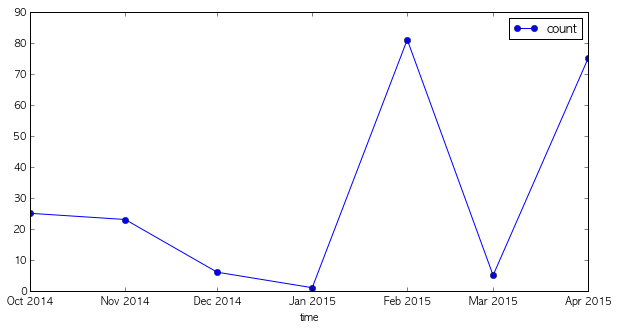

In [74]:
# plot like counts by time
df.plot(x="time", y="count", marker='o', figsize=(10,5))

### 處理中文字顯示問題
`matplotlib`預設可能不認中文字型，需要特別指定給他。

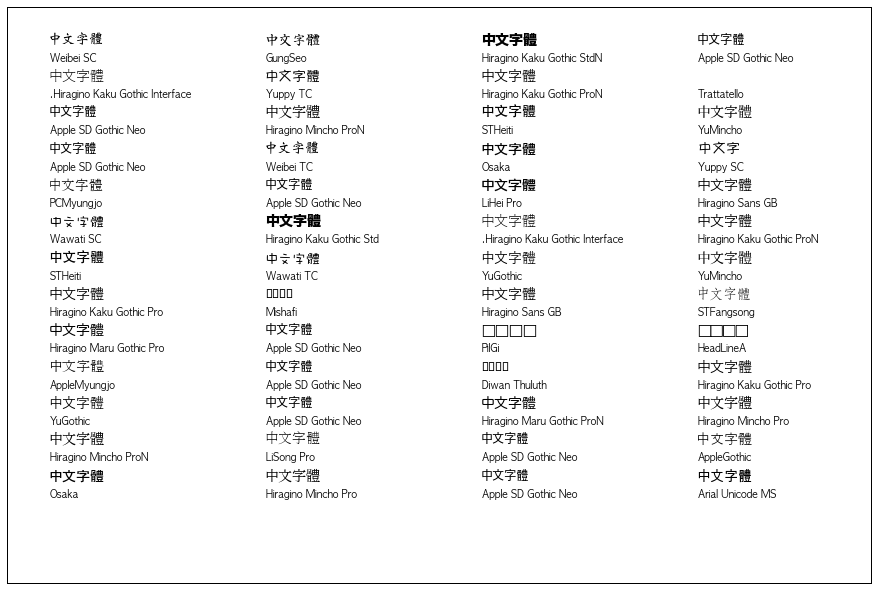

In [75]:
# run the following code to show all available Chinese font family on your computer
from matplotlib.font_manager import fontManager 
import os 
 
fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(111) 
plt.subplots_adjust(0, 0, 1, 1, 0, 0) 
plt.xticks([]) 
plt.yticks([]) 
x, y = 0.05, 0.18 
fonts = [font.name for font in fontManager.ttflist if 
    os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts) 
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0)) 
for font in fonts: 
    t = ax.text(x, y, u"中文字體", {'fontname':font, 'fontsize':14}, transform=ax.transAxes) 
    ax.text(x, y-dy/2, font, transform=ax.transAxes) 
    x += 0.25 
    if x >= 1.0: 
        y += dy 
        x = 0.05 
# plt.show() # not necessary in ipython notebook

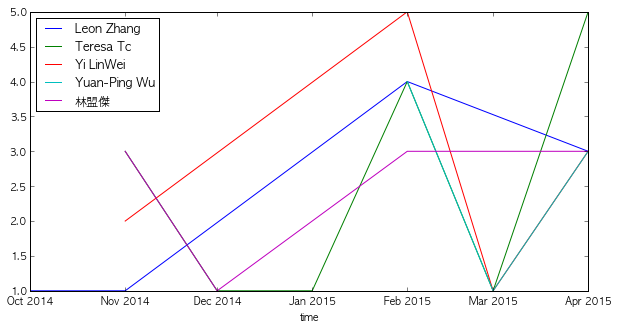

In [76]:
# plot like counts by time by top likers
matplotlib.rc("font", family="AppleGothic") # set any Chinese font family
fig, ax = plt.subplots(1,1)
p = df2_filtered.groupby("liker").plot(x="time", y="count", marker='x', ax=ax, figsize=(10,5))
plt.legend(list(p.axes[0].get_values()), loc="best")

## scenario: the warrior of likes
## 狂讚士＼傳說啟程／

#### spec:
+ 給定一個使用者，一段時間的文章：
    + 全部給他讚下去

### 步驟一：觀察你的朋友清單
`me/friends`

> 不是所有朋友都能被查到！
    
<img src="img/debug-message.png">

### 小技巧：如何得知一個使用者的Graph API ID?

> 右鍵Inspect Element大法！搜尋"data-uid"...

<img src="img/data-uid.png">

### 步驟二：觀察朋友的文章
`<post_id>/posts`

> 不是所有的朋友的文章都能被Graph API抓出來！

In [36]:
# get list of all avaiable friends on me node
def getAllFriendsOnAPI(token):
    fr = []
    target = "https://graph.facebook.com/v2.4/me/friends?fields=name"
    qs = {"access_token": token}
    res = requests.get(target, params=qs).json()
    fr += res["data"]
    while "next" in res["paging"]:
        res = requests.get(res["paging"]["next"]).json()
        fr += res["data"]
    return fr

In [40]:
token = "CAACEdEose0cBAL904Js5Xl2RHrf15tZBGZBOwmUotrvJE660yjwZCZAK6nJd54bFlE4ZAvEf2ZCxGZC6DfusFCZCnDJUPT36bJZBQHkr8WZByrr1HPSb7AVKq632li0RsAbC0todLXr7g4RZBk1MkdbERYzw6Yqs5lIU1I5M5JoJeIqMOpwvbJcyOtM3mYLC2SedbieObS6cVNgpgZDZD"
friends = getAllFriendsOnAPI(token)
friends[:6]

[{u'id': u'348900235', u'name': u'Han-Wen Chang'},
 {u'id': u'503482470', u'name': u'Ning Chen'},
 {u'id': u'523887614', u'name': u'\u9673\u594e\u9298'},
 {u'id': u'524871968', u'name': u'Pin Wu'},
 {u'id': u'710176842', u'name': u'Linhots Tsao'},
 {u'id': u'1045695611', u'name': u'Chih-Peng Wu'}]

In [77]:
# get list of posts given a user id
def getAllPosts(user, token): 
    posts = []
    api_addr = "https://graph.facebook.com/v2.4/%s/posts" % user
    qs = {"access_token": token}
    res = requests.get(api_addr, params=qs).json()
    if not len(res["data"]):
        return []
    else: 
        posts += [ d["id"] for d in res["data"] ]
        while "paging" in res and next in res["paging"]:
            res = requests.get(res["paging"]["next"]).json()
            post_ids += [ d["id"] for d in res["data"] ]
        return posts

In [83]:
from functools import partial

all_posts = map(partial(getAllPosts, token=token), 
                [ f["id"] for f in friends ])
results = zip(friends, all_posts)

In [85]:
for r in results:
    print "get %s post(s) from %s" % (len(r[1]), r[0]["name"])

get 0 post(s) from Han-Wen Chang
get 0 post(s) from Ning Chen
get 21 post(s) from 陳奎銘
get 0 post(s) from Pin Wu
get 25 post(s) from Linhots Tsao
get 0 post(s) from Chih-Peng Wu
get 23 post(s) from Chia-Chi Chang
get 25 post(s) from Summit Suen
get 25 post(s) from Ddio Juan
get 23 post(s) from Mansun Kuo
get 0 post(s) from 蘇中才
get 0 post(s) from 王雅人
get 25 post(s) from 陳嘉葳
get 24 post(s) from 趙致平
get 0 post(s) from Julie Woo
get 22 post(s) from Arvin Huang
get 24 post(s) from Chien-Wen Chen
get 2 post(s) from Haoping Liu
get 0 post(s) from Felix Shiao
get 25 post(s) from Ikki Oda
get 22 post(s) from Ming-Yi Huang
get 20 post(s) from 徐嘉泰
get 25 post(s) from Chen John


### 步驟三：讚！


In [89]:
# function to like a post
def postLikes(post, token): 
    posts = []
    api_addr = "https://graph.facebook.com/v2.4/%s/likes" % post
    qs = {"access_token": token}
    return requests.post(api_addr, params=qs)

## programmatically get the access token?
> that is beyond the scope of this course :)

# Regular Expression
## 正規表示法

## what is re? 它是什麼？
+ from wikipedia:
> a regular expression (abbreviated regex or regexp and sometimes called a rational expression) is **a sequence of characters that define a search pattern**, mainly for use in pattern matching with strings, or string matching, i.e. "find and replace"-like operations.

+ <span style="font-size:20pt;">「一串字元，用來表示一種可供匹配搜尋的字串模式。」</span>

## why re? 為什麼需要它？

+ sometimes only css selector/xpath is not enough
    + example => [an imgur album](http://imgur.com/a/0I6pd)
    + where you want to download all the images, programmatically
    + contents wanted may not be *structurally* distinguishable
    + BUT could be distinguishable in their *string pattern*
<img src="img/imgur.png">
+ => [a solution](https://github.com/everdark/imgur-crawler)

## little dataset, big trouble
## 初戰 正規表示法：電話號碼地獄
> kyle chung; (02)2256-1116; New Taipei City
<br>
Mr. Funghi,Earth Anywhere, 07-21180293
<br>
free tel: 0800 000 123 #1234
<br>
Dr.A (not Dr.B) street no.123 2945 1412

+ requirement:
    + extract all *telephone numbers* in the above four records

In [44]:
# let's make a playground!
import re

test_str = ["kyle chung; (02)2256-1116; New Taipei City",
            "Mr. Funghi,Earth Anywhere, 07-21180293",
            "free tel: 0800 000 123 #1234",
            "Dr.A (not Dr.B) street no.123 2945 1412"]

def findFirstMatched(pattern, test_str=test_str):
    p = re.compile(pattern)
    print "\n=== result of findFirstMatched ==="
    for i, s in enumerate(test_str):
        m = p.search(s)
        if m:
            print "row %s:" % i, m.group()
        else:
            print "row %s: no match" % i
    return None

def findAllMatched(pattern, test_str=test_str):
    p = re.compile(pattern)
    print "\n=== result of findAllMatched ==="
    for i, s in enumerate(test_str):
        matched = p.findall(s)
        print "row %s: " % i, matched
    return None

In [45]:
# test first-matched

findFirstMatched("3")


=== result of findFirstMatched ===
row 0: no match
row 1: 3
row 2: 3
row 3: 3


In [46]:
# test all-matched

findAllMatched("3")


=== result of findAllMatched ===
row 0:  []
row 1:  ['3']
row 2:  ['3', '3']
row 3:  ['3']


### 找出任一數字

In [47]:
# 1st try: get all digits

for s in test_str:
    print s
    
findFirstMatched("[0-9]")
findAllMatched("[0-9]")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: 0
row 1: 0
row 2: 0
row 3: 1

=== result of findAllMatched ===
row 0:  ['0', '2', '2', '2', '5', '6', '1', '1', '1', '6']
row 1:  ['0', '7', '2', '1', '1', '8', '0', '2', '9', '3']
row 2:  ['0', '8', '0', '0', '0', '0', '0', '1', '2', '3', '1', '2', '3', '4']
row 3:  ['1', '2', '3', '2', '9', '4', '5', '1', '4', '1', '2']


### 找出任一串連續數字

In [48]:
# 2nd try: get all digits, not just one

for s in test_str:
    print s
    
findFirstMatched("[0-9]+")
findAllMatched("[0-9]+")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: 02
row 1: 07
row 2: 0800
row 3: 123

=== result of findAllMatched ===
row 0:  ['02', '2256', '1116']
row 1:  ['07', '21180293']
row 2:  ['0800', '000', '123', '1234']
row 3:  ['123', '2945', '1412']


### 找出任一串連續數字，可包含連字號

In [49]:
# 3rd try: get all digits, not just one, and dash
for s in test_str:
    print s

findFirstMatched("[0-9-]+")
findAllMatched("[0-9-]+")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: 02
row 1: 07-21180293
row 2: 0800
row 3: 123

=== result of findAllMatched ===
row 0:  ['02', '2256-1116']
row 1:  ['07-21180293']
row 2:  ['0800', '000', '123', '1234']
row 3:  ['123', '2945', '1412']


### 任一串連續數字，可包含連字號與小括號

In [50]:
# 4th try: get all digits, not just one, and dash and paranthesis and blanks...

for s in test_str:
    print s
    
findFirstMatched("[0-9-()]+")
findAllMatched("[0-9-()]+")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: (02)2256-1116
row 1: 07-21180293
row 2: 0800
row 3: (

=== result of findAllMatched ===
row 0:  ['(02)2256-1116']
row 1:  ['07-21180293']
row 2:  ['0800', '000', '123', '1234']
row 3:  ['(', ')', '123', '2945', '1412']


### 任一串連續數字，可含連字號、小括號、與空格

In [51]:
# now allow blanks, oops!

for s in test_str:
    print s
    
findFirstMatched("[0-9-() ]+")
findAllMatched("[0-9-() ]+")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0:  
row 1:  
row 2:  
row 3:  (

=== result of findAllMatched ===
row 0:  [' ', ' (02)2256-1116', ' ', ' ', ' ']
row 1:  [' ', ' ', ' 07-21180293']
row 2:  [' ', ' 0800 000 123 ', '1234']
row 3:  [' (', ' ', ') ', ' ', '123 2945 1412']


### 小括號「可有可無」

In [52]:
# test for optional parenthesis

for s in test_str:
    print s

findFirstMatched("\(?[0-9]+\)?")
findAllMatched("\(?[0-9]+\)?")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: (02)
row 1: 07
row 2: 0800
row 3: 123

=== result of findAllMatched ===
row 0:  ['(02)', '2256', '1116']
row 1:  ['07', '21180293']
row 2:  ['0800', '000', '123', '1234']
row 3:  ['123', '2945', '1412']


In [53]:
# optional parenthesis/dash and consecutive numbers

for s in test_str:
    print s
    
findFirstMatched("\(?[0-9]+\)?[0-9-]+")
findAllMatched("\(?[0-9]+\)?[0-9-]+")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: (02)2256-1116
row 1: 07-21180293
row 2: 0800
row 3: 123

=== result of findAllMatched ===
row 0:  ['(02)2256-1116']
row 1:  ['07-21180293']
row 2:  ['0800', '000', '123', '1234']
row 3:  ['123', '2945', '1412']


In [54]:
# optional parenthesis/dash and consecutive numbers/blanks

for s in test_str:
    print s

findFirstMatched("\(?[0-9]+\)?[0-9- ]+")
findAllMatched("\(?[0-9]+\)?[0-9- ]+")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: (02)2256-1116
row 1: 07-21180293
row 2: 0800 000 123 
row 3: 123 2945 1412

=== result of findAllMatched ===
row 0:  ['(02)2256-1116']
row 1:  ['07-21180293']
row 2:  ['0800 000 123 ', '1234']
row 3:  ['123 2945 1412']


### 限制出現次數

In [55]:
# restrict numbers of digits

for s in test_str:
    print s
    
findFirstMatched("\(?[0-9]{0,2}\)?-?[0-9]{4}[ -]?[0-9]{4}")
findAllMatched("\(?[0-9]{0,2}\)?-?[0-9]{4}[ -]?[0-9]{4}")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: (02)2256-1116
row 1: 07-21180293
row 2: no match
row 3: 2945 1412

=== result of findAllMatched ===
row 0:  ['(02)2256-1116']
row 1:  ['07-21180293']
row 2:  []
row 3:  ['2945 1412']


In [56]:
# build a second pattern

for s in test_str:
    print s

findFirstMatched("[0-9]{4}[ ]?[0-9]{3}[ ]?[0-9]{3}")
findAllMatched("[0-9]{4}[ ]?[0-9]{3}[ ]?[0-9]{3}")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: no match
row 1: no match
row 2: 0800 000 123
row 3: no match

=== result of findAllMatched ===
row 0:  []
row 1:  []
row 2:  ['0800 000 123']
row 3:  []


### 兩種模式任一吻合

In [57]:
# combine two patterns with or operator

for s in test_str:
    print s

findFirstMatched("\(?[0-9]{0,2}\)?-?[0-9]{4}[ -]?[0-9]{4}|[0-9]{4}[ ]?[0-9]{3}[ ]?[0-9]{3}")
findAllMatched("\(?[0-9]{0,2}\)?-?[0-9]{4}[ -]?[0-9]{4}|[0-9]{4}[ ]?[0-9]{3}[ ]?[0-9]{3}")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: (02)2256-1116
row 1: 07-21180293
row 2: 0800 000 123
row 3: 2945 1412

=== result of findAllMatched ===
row 0:  ['(02)2256-1116']
row 1:  ['07-21180293']
row 2:  ['0800 000 123']
row 3:  ['2945 1412']


### 最後一步！允許分機號碼

In [58]:
# deal with optional extension digits

for s in test_str:
    print s

findFirstMatched("\(?[0-9]{0,2}\)?-?[0-9]{4}[ -]?[0-9]{4}|[0-9]{4}[ ]?[0-9]{3}[ ]?[0-9]{3}[ ]?#?[0-9]+")
findAllMatched("\(?[0-9]{0,2}\)?-?[0-9]{4}[ -]?[0-9]{4}|[0-9]{4}[ ]?[0-9]{3}[ ]?[0-9]{3}[ ]?#?[0-9]+")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: (02)2256-1116
row 1: 07-21180293
row 2: 0800 000 123 #1234
row 3: 2945 1412

=== result of findAllMatched ===
row 0:  ['(02)2256-1116']
row 1:  ['07-21180293']
row 2:  ['0800 000 123 #1234']
row 3:  ['2945 1412']


## components of re 正規表達式的基本元件
+ characters (string-literals)
    + ABCabc123
+ meta-characters (operators)
    + `. ^ $ * + ? { } [ ] \ | ( )`
+ special sequences (short-cuts)
    + `\d \D \s \S \w \W \b \B`

### wildcarder: `.` 任意字
match anything except newline(`\n`)

In [63]:
for s in test_str:
    print s
findAllMatched(".")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findAllMatched ===
row 0:  ['k', 'y', 'l', 'e', ' ', 'c', 'h', 'u', 'n', 'g', ';', ' ', '(', '0', '2', ')', '2', '2', '5', '6', '-', '1', '1', '1', '6', ';', ' ', 'N', 'e', 'w', ' ', 'T', 'a', 'i', 'p', 'e', 'i', ' ', 'C', 'i', 't', 'y']
row 1:  ['M', 'r', '.', ' ', 'F', 'u', 'n', 'g', 'h', 'i', ',', 'E', 'a', 'r', 't', 'h', ' ', 'A', 'n', 'y', 'w', 'h', 'e', 'r', 'e', ',', ' ', '0', '7', '-', '2', '1', '1', '8', '0', '2', '9', '3']
row 2:  ['f', 'r', 'e', 'e', ' ', 't', 'e', 'l', ':', ' ', '0', '8', '0', '0', ' ', '0', '0', '0', ' ', '1', '2', '3', ' ', '#', '1', '2', '3', '4']
row 3:  ['D', 'r', '.', 'A', ' ', '(', 'n', 'o', 't', ' ', 'D', 'r', '.', 'B', ')', ' ', 's', 't', 'r', 'e', 'e', 't', ' ', 'n', 'o', '.', '1', '2', '3', ' ', '2', '9', '4', '5', ' ', '1', '4', '1', '2']


### bounders: `^ $` 首尾字修飾子
+ `^`: (following) the beginning character
    + `^this` matches anything started with "this"
+ `$`: (preceding) the ending character
    + `that$` matches anything ended with "that"

In [67]:
for s in test_str:
    print s
findFirstMatched("^kyle")
findFirstMatched("^Earth")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: kyle
row 1: no match
row 2: no match
row 3: no match

=== result of findFirstMatched ===
row 0: no match
row 1: no match
row 2: no match
row 3: no match


### repeaters: `* + ?` 重複子
to specify the occurrence condition of its previous character
+ `*`: any occurrence (including zero)
+ `+`: at least one occurrence
+ `?`: zero or exactly one occurrence

In [65]:
for s in test_str:
    print s
findFirstMatched("^kyle.*")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: kyle chung; (02)2256-1116; New Taipei City
row 1: no match
row 2: no match
row 3: no match


### advanced repeaters: `{m,n}` 計數重複子
at least `m` and at most `n` occurrence

example:
+ `a{1,3}`: character "a" must occur at least one and at most three time
+ `a{1,}`: character "a" must occur at least one time
+ `a{,3}`: character "a" must occur at most three time

In [71]:
for s in test_str:
    print s
findFirstMatched("0{3,3}") # could be "0{3}" for short

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findFirstMatched ===
row 0: no match
row 1: no match
row 2: 000
row 3: no match


### `[]`: character class 多字元類聚
+ to specify a set of characters that may occcur
+ most meta-char will lose their speacial meaning within the class
    + `[0-9$]` matches any of numbers 0 to 9 or the dollar sign($)
    + here the bounder meta-char `$` is treated as-is
+ special meaning only triggered within the class:
    + `-`: ranger, e.g., `[0-9a-zA-Z]`
    + `^`: negator, e.g., `[^0-9]`

In [75]:
for s in test_str:
    print s
findAllMatched("[a-zA-Z]+")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findAllMatched ===
row 0:  ['kyle', 'chung', 'New', 'Taipei', 'City']
row 1:  ['Mr', 'Funghi', 'Earth', 'Anywhere']
row 2:  ['free', 'tel']
row 3:  ['Dr', 'A', 'not', 'Dr', 'B', 'street', 'no']


### or: `|` 或
example:
+ `abc|def`: either "abc" or "def"

In [80]:
for s in test_str:
    print s
findAllMatched("kyle|Funghi")
findAllMatched("[Kk]yle|[Ff]unghi")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findAllMatched ===
row 0:  ['kyle']
row 1:  ['Funghi']
row 2:  []
row 3:  []

=== result of findAllMatched ===
row 0:  ['kyle']
row 1:  ['Funghi']
row 2:  []
row 3:  []


### grouper: `()` 群組
example:
+ `(abc)+`: at least one occurrence of "abc"
+ `abc+`: here the repeater `+` only operates on character "c"

### escaper: `\` 跳脫子
to have its following character **as-is**, i.e., stripping special meaning

this is required when you want to match literal meta-char

In [83]:
for s in test_str:
    print s
findAllMatched("\(.*\)")

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findAllMatched ===
row 0:  ['(02)']
row 1:  []
row 2:  []
row 3:  ['(not Dr.B)']


### special sequences 其他特殊字元
short-cut of specific character classes
+ `\d`: any decimal digit => `[0-9]`
+ `\D`: any non-digit => `[^0-9]`
+ `\s`: any white space => `[ \t\n\r\f\v]`
+ `\S`: any non-white space => `[^ \t\n\r\f\v]`
+ `\w`: any alphanumeric => `[a-zA-Z0-9_]`
+ `\W`: any non-alphanumeric => `[^a-zA-Z0-9_]`
+ `\b`: matches the empty string, but only at the beginning or end of a word (\w)

In [95]:
for s in test_str:
    print s
findAllMatched("\d+")
findAllMatched("[\d\D]+") # can be used in class

kyle chung; (02)2256-1116; New Taipei City
Mr. Funghi,Earth Anywhere, 07-21180293
free tel: 0800 000 123 #1234
Dr.A (not Dr.B) street no.123 2945 1412

=== result of findAllMatched ===
row 0:  ['02', '2256', '1116']
row 1:  ['07', '21180293']
row 2:  ['0800', '000', '123', '1234']
row 3:  ['123', '2945', '1412']

=== result of findAllMatched ===
row 0:  ['kyle chung; (02)2256-1116; New Taipei City']
row 1:  ['Mr. Funghi,Earth Anywhere, 07-21180293']
row 2:  ['free tel: 0800 000 123 #1234']
row 3:  ['Dr.A (not Dr.B) street no.123 2945 1412']


# Regex in Python<span style="color:blue"> | Basic</span>
## 在Python使用正規表達式

## import python re module

In [6]:
import re

## compile a regex 編譯正規表示法

In [7]:
p = re.compile("test+")

# return a pattern object
print p

# check methods
[me for me in dir(p) if callable(getattr(p, me)) and not "__" in me]

['findall', 'finditer', 'match', 'scanner', 'search', 'split', 'sub', 'subn']

### the `match` method 從頭找起
to perform pattern matching **from the beginning** of a string

In [8]:
print p.match("123")

None


In [9]:
print p.match("123test")

None


In [10]:
print p.match("tes")

None


In [11]:
print p.match("test")

In [12]:
print p.match("testttttset")

### the `match` object

In [21]:
m = p.match("testttttset")
[me for me in dir(m) if callable(getattr(m, me)) and not "__" in me]

['end', 'expand', 'group', 'groupdict', 'groups', 'span', 'start']

In [22]:
# return the matched string
m.group()

'testtttt'

In [19]:
"the match starts at pos %s and ends at pos %s" % (m.start(), m.end())

'the match starts at pos 0 and ends at pos 8'

In [20]:
"the match starts at pos %s and ends at pos %s" % m.span()

'the match starts at pos 0 and ends at pos 8'

### the `search` method 任意位置開始搜尋
to perform pattern matching **from anywhere** of a string

In [23]:
m = p.search("123test456")
if m:
    print "pattern matched at pos %s to pos %s" % m.span()
else:
    print "no match"

pattern matched at pos 3 to pos 7


### the `findall` and `finditer` method 找全部的匹配
both `match` and `search` return only the *first* matched

In [27]:
p = re.compile("\d")
p.findall("24 hours a day; 8 in sleep and 8 for works")

['2', '4', '8', '8']

In [28]:
for m in p.finditer("24 hours a day; 8 in sleep and 8 for works"):
    print "\'%s\' found at %s" % (m.group(), m.span())

'2' found at (0, 1)
'4' found at (1, 2)
'8' found at (16, 17)
'8' found at (31, 32)


### exercise!
>1 round for Daan Park is 2350m

=> try to retrieve two numbers present in the above sentence. (1 and 2350)

In [33]:
test_str = "1 round for Daan Park is 2350m"

In [38]:
m = re.findall("\d+", test_str)
m

['1', '2350']

## implicit compile 直譯正規表示法
methods like `search`, `match`, and `findall` can be called on module-level

In [35]:
m = re.findall("\d+", "1 round for Daan Park is 2350m")
print m

['1', '2350']


In [36]:
m = re.match("\d+", "1 round for Daan Park is 2350m")
print m.group()

1


In [30]:
m = re.search("\d+", "1 round for Daan Park is 2350m")
print m.group()

1


## more on `group` and `groups` method

In [38]:
m = re.match("([0-9]+)([a-z]+)", "123abc456")

# return the whole matched (sub)string
m.group()

'123abc'

In [39]:
# if grouper is used, they can be retrieved individually

m.group(0), m.group(1), m.group(2)

('123abc', '123', 'abc')

In [40]:
# or multiple retrieved

m.group(1,2,1)

('123', 'abc', '123')

In [41]:
# return each group matched in a tuple (works only if grouper is used)

m.groups() 

('123', 'abc')

In [42]:
# or in a dictionary
m.groupdict()

{}

(see the <a href="#/4">advanced section</a>)

### exercise revisited

In [54]:
test_str = "1 round for Daan Park is 2350m"

m = re.match("(\d+).*(\d+).*", test_str)
m.group(1, 2) # failed to retrieve the second number (what's wrong?)

('1', '0')

In [55]:
m = re.match("(\d+)[^0-9]*(\d+).*", test_str)
m.groups() # repeater is GREEDY: they try to match as many as possible

('1', '2350')

### another exercise!
> my code is 12
<br>
Mr. lucky7's code is 76
<br>
are you coded no.1?
<br>

=> retrieve all "code number" in this three lines

In [82]:
test_str = ["my code is 12", 
            "Mr. lucky7's code is 76",
            "are you coded no.1?"]

In [83]:
# hard-coded re
# useless, and sometimes dangerous!
p = re.compile("(12|76|1)")
[ p.search(s).group() for s in test_str ]

['12', '76', '1']

In [58]:
# match the number ended in the sentence, with optionally question mark
# still somewhat problem-specific and hence less general
# also notice that .findall only returns string matched in grouper, 
#     try "(\d+\??)" instead to see the diff
p = re.compile("(\d+)\??$")
[ p.findall(s)[-1] for s in test_str ]

['12', '76', '1']

In [59]:
# match all numbers and return the last one
p = re.compile("\d+")
[ p.findall(s)[-1] for s in test_str ]

['12', '76', '1']

### challenge 1
> My name is Kyle Chung, loving buying at PChome.

=> retrieve first-char-capitalized words 

In [78]:
test_str = "My name is Kyle Chung, loving buying at PChome."

In [79]:
# this one fails

m = re.compile("[A-Z][a-z]+")
m.findall(test_str)

['My', 'Kyle', 'Chung', 'Chome']

In [80]:
# bounder "\b" is essential here
# why double the escaper?

m = re.compile("\\b[A-Z][a-z]+\\b")
m.findall(test_str)

['My', 'Kyle', 'Chung']

(see the <a href="#/4">advanced section</a>: "Raw Strign Notation" for more info about double escaping) 

### challenge 2
> Things are getting HARDER! Now try capturing CamelUpperCased word(s).

=> retrieve any camel-cased word.

In [66]:
test_str = "Things are getting HARDER! Now try capturing CamelUpperCased word(s)."

In [132]:
for m in re.finditer("([A-Z][a-z]+)+", test_str):
    print m.group()

Things
Now
CamelUpperCased


In [154]:
for m in re.finditer("([A-Z][a-z]+){2,}", test_str):
    print m.group()

CamelUpperCased


In [157]:
# but why fail in this?

re.findall("([A-Z][a-z]+){2,}", test_str)

['Cased']

In [158]:
# only one grouper but matched three times, values are overwritten to the matched group
# and findall sinces to return only matched group(s) when grouper is used

for m in re.finditer("([A-Z][a-z]+){2,}", test_str):
    print m.groups()

('Cased',)


In [159]:
# a possible fix

for m in re.finditer("(([A-Z][a-z]+){2,})", test_str):
    print m.groups()

('CamelUpperCased', 'Cased')


In [67]:
# to see things clearly

re.findall("(([A-Z][a-z]+){1,})", test_str)

[('Things', 'Things'), ('Now', 'Now'), ('CamelUpperCased', 'Cased')]

## the substitution method 字串取代

In [70]:
test_str = "ABCdef"

# direct compile
p = re.compile("[A-Z]")
p.sub("1", test_str)

'111def'

In [73]:
# implicit compile
re.sub("[A-Z]", "1", test_str)

'111def'

In [75]:
# restrict number of replacements
re.sub("[A-Z]", "1", test_str, count=1)

'1BCdef'

### function as replacement

In [78]:
test_str = "ABCdefghij"
re.sub("[a-z]+", lambda x: str(len(x.group())), test_str)

'ABC7'

# Regex in Python<span style="color:blue"> | Advanced</span>
## 進階的正規表示法
+ regex extensions: `(?<pattern>)`
+ raw string notation
+ 中文字串

## re extensions
+ non-capturer: `(?:<pattern>)`
+ ahead-looker: `(?=<pattern>)` and `(?!<pattern>)`
+ named-grouper: `(?P<gname>)`
+ backreferer: `(?P=<gname>)`

### non-capturer: `(?:...)` ｜匹配但不抓取
to match without returning matched

In [18]:
import re

test_str = "metadata:{name: kyle, age: 18, gender: male}"

In [19]:
m = re.search("(name: )(\w+)", test_str)
print "string returned by .group  => \t" + str(m.group())
print "string returned by .groups => \t" + str(m.groups())

string returned by .group  => 	name: kyle
string returned by .groups => 	('name: ', 'kyle')


In [20]:
m = re.search("(?:name: )(\w+)", test_str)
print "string returned by .group  => \t" + str(m.group())
print "string returned by .groups => \t" + str(m.groups())

string returned by .group  => 	name: kyle
string returned by .groups => 	('kyle',)


In [22]:
# back to the previous exercise:
# match first digits after string "code"

test_str = ["my code is 12", 
            "Mr. lucky7's code is 76",
            "are you coded no.1?"]
p = re.compile("(?:code)[^0-9]*(\d+)")
[ p.search(s).groups() for s in test_str ]

[('12',), ('76',), ('1',)]

### ahead-looker: `(?=...)` and `(?!...)` ｜條件往前找
only to match when the asserted string is (not) matched first

In [25]:
# again, match first digits after string "code"

test_str = ["my code is 12", 
            "Mr. lucky7's code is 76",
            "are you coded no.1?"]
p = re.compile("(?=code)[^0-9]*(\d+)")
[ p.search(s).groups() for s in test_str ]

[('12',), ('76',), ('1',)]

### named-grouper: `(?P<gname>)`｜命名群組
a python-specific extension

In [37]:
test_str = "metadata:{name: kyle, age: 18, gender: male}"
p1 = re.compile("(name: )(\w+).*(age: )(\d+)")
m1 = p1.search(test_str)
m1.groups()

('name: ', 'kyle', 'age: ', '18')

In [43]:
p2 = re.compile("(name: )(?P<username>\w+).*(age: )(?P<userage>\d+)")
m2 = p2.search(test_str)
m2.groups()

('name: ', 'kyle', 'age: ', '18')

In [44]:
m2.groupdict()

{'userage': '18', 'username': 'kyle'}

### backreferer by name: `(?P=gname)`｜往回參照
yet anotehr python-specific extension

In [146]:
# usage of backrefer

test_str = "This test is a test about backrefer."
m = re.search("(test)(.*)\\1", test_str)
m.groups()

('test', ' is a ')

In [167]:
# usage of backrefer by name (python-specific)

m = re.search("(?P<g1>test)(.*)(?P=g1)", test_str)
m.groups()

('test', '(a) and test(b) should be replaced while ')

In [179]:
# backreference and replacement

test_str = "test(a) and test(b) should be replaced while test should not"
re.sub("test\(([a-z])\)", "new(\\1)", test_str)

'new(a) and new(b) should be replaced while test should not'

In [177]:
# alternatively:

re.sub("test\((?P<target>[a-z])\)", "new(\g<1>)", test_str)

'new(a) and new(b) should be replaced while test should not'

In [176]:
# or by name

re.sub("test\((?P<target>[a-z])\)", "new(\g<target>)", test_str)

'new(a) and new(b) should be replaced while test should not'

In [182]:
# surprisingly not working:
# (?P=name) must be used along with (?P<name>) in the same expression
# in case of replacement operation, the above does not hold

re.sub("test\((?P<target>[a-z])\)", "new((?P=target))", test_str)

'new((?P=target)) and new((?P=target)) should be replaced while test should not'

## Raw String Notation
in Python, string expression may contain special characters (i.e., meta-char)

In [62]:
print "a string"

a string


In [63]:
print "\n a string with newline"


 a string with newline


In [164]:
print "\n a string with newline"


 a string with newline


In [167]:
print "\\n a string with escaped newline char"

\n a string with escaped newline char


In [169]:
print r"\n a string with newline char"

\n a string with newline char


### the troublesome `\b`

In [177]:
# in python, \b is specially treated

print "the char \\b has special meaning of ASCII Backspace -> [\b]"

the char \b has special meaning of ASCII Backspace -> []


In [196]:
# however, in re, \b is ALSO specially treated

p = re.compile("\b[A-Z][a-z]+")
m = p.match("Hello")
print m # no match since \b is not triggered as meta-char in re

None


In [198]:
# need an escape

p = re.compile("\\b[A-Z][a-z]+")
m = p.match("Hello")
print m.group()

Hello


In [199]:
# alternatively, use raw string notation

p = re.compile(r"\b[A-Z][a-z]+")
m = p.match("Hello")
print m.group()

Hello


## 中文字串

In [101]:
import re
cstr = "哈哈囉你好"

In [102]:
# sound good

m = re.search("哈囉", cstr)
print m.group()

哈囉


In [103]:
# but this is not working

m = re.search("哈+", cstr)
print m.group()

哈


In [105]:
# try instead

m = re.search("(哈)+", cstr)
print m.group()

哈哈


In [121]:
# the reason being that a Chinese character is indeed a set of ASCII characters

m.group()

'\xe5\x93\x88\x88'

In [118]:
# to verify this...

m = re.search("哈+", "哈\x88")

In [119]:
m.group()

'\xe5\x93\x88\x88'

In [120]:
print m.group()

哈�


# Reference
+ [Facebook official Graph API reference](https://developers.facebook.com/docs/graph-api/reference/)
+ [Python official re tutorial](https://docs.python.org/2/howto/regex.html)
+ [Unix timestamp converter](http://www.epochconverter.com)
+ regex visualizer / tester:
    + [Debuggex](https://www.debuggex.com)
    + [regex101](https://regex101.com/#python)

# Appendix
+ Python function `decorator` usage
+ Python `map` method

## Python function decorator example

In [1]:
def printArgs(*args):
    for arg in args:
        print arg

printArgs(1,2,3)

1
2
3


In [2]:
# decorator without argument
def decorate(func):
    def wrapper(*args, **kwargs):
        print "decorated!"
        return func(*args, **kwargs)
    return wrapper

@decorate
def printArgs(*args):
    for arg in args:
        print arg

printArgs(1,2,3)

decorated!
1
2
3


In [49]:
# decorator with argument(s)
def decorateWithArg(dname):
    def realWrapper(func):
        def wrapper(*args, **kwargs):
            print "decorated by %s!" % dname
            return func(*args, **kwargs)
        return wrapper
    return realWrapper

@decorateWithArg("test")
def printArgs(*args):
    for arg in args:
        print arg

printArgs(1,2,3)

decorated by test!
1
2
3


## Python `map` method

In [56]:
# apply a function with exactly one argument
def addOne(x):
    return x + 1

one2nine = range(0, 10)

In [57]:
print one2nine

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [58]:
print map(addOne, one2nine)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [68]:
# apply a function with more than one argument
def addY(x, y):
    return x + y

In [69]:
# if y is unchanged
from functools import partial
print map(partial(addY, y=10), one2nine)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [70]:
# if y is changing
import itertools
print map(addY, one2nine, itertools.chain(range(0, 10)))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


# Thank you for your attention
<a href="https://docs.google.com/presentation/d/14KdDiH2B1BgcUFmiIyowFjZT_20qvTySTYy968tGL9M/pub?start=false&loop=false&delayms=3000">Curtain Call</a> /
<a href="https://docs.google.com/forms/d/1qSJ5O84mFbpWcw8OAaDp4mXaGnAFq015_GWwz6a7Ep8/viewform">Give FeedBack</a>